In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

2023-10-21 18:55:41.794710: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-21 18:55:41.794738: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-21 18:55:41.794744: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-21 18:55:41.794782: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-21 18:55:41.794800: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        3200      
                                                                 
 batch_normalization (Batch  (None, 24, 24, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 12, 12, 64)        2

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Epoch 1/50


2023-10-21 18:55:44.153121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-21 18:55:44.359008: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


225/225 [==============================] - 20s 76ms/step - loss: 1.7964 - categorical_accuracy: 0.2688 - val_loss: 1.8440 - val_categorical_accuracy: 0.2494 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 13s 60ms/step - loss: 1.6568 - categorical_accuracy: 0.3419 - val_loss: 2.0023 - val_categorical_accuracy: 0.3104 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 13s 58ms/step - loss: 1.5803 - categorical_accuracy: 0.3788 - val_loss: 6.4570 - val_categorical_accuracy: 0.1477 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 13s 60ms/step - loss: 1.5082 - categorical_accuracy: 0.4118 - val_loss: 2.4012 - val_categorical_accuracy: 0.2614 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 14s 60ms/step - loss: 1.4122 - categorical_accuracy: 0.4511 - val_loss: 1.4040 - val_categorical_accuracy: 0.4581 - lr: 5.0000e-04
Epoch 6/50
225/225 [==============================] - 13s 58ms/step - loss: 1.3765 - categorical_accur

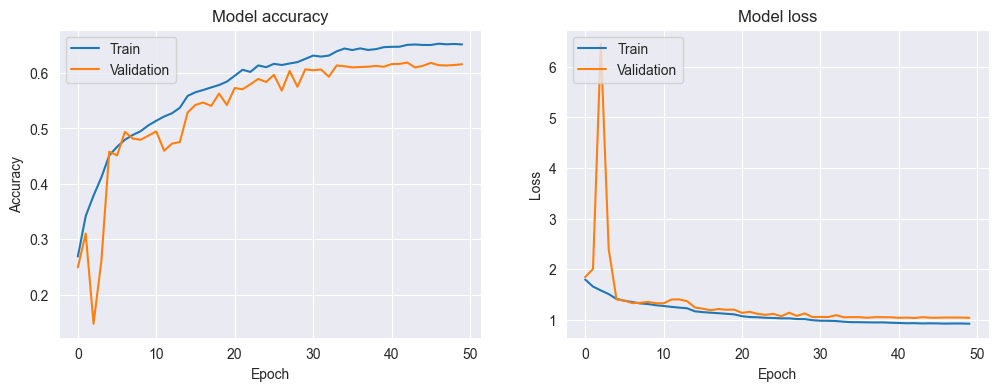

29/29 [==============================] - 0s 15ms/step - loss: 1.0001 - categorical_accuracy: 0.6353
Test Accuracy: 63.53%
29/29 [==============================] - 1s 14ms/step


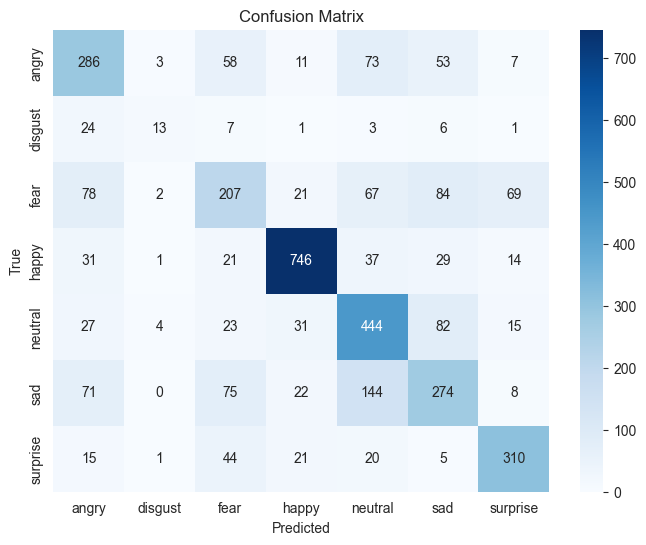

              precision    recall  f1-score   support

       angry       0.54      0.58      0.56       491
     disgust       0.54      0.24      0.33        55
        fear       0.48      0.39      0.43       528
       happy       0.87      0.85      0.86       879
     neutral       0.56      0.71      0.63       626
         sad       0.51      0.46      0.49       594
    surprise       0.73      0.75      0.74       416

    accuracy                           0.64      3589
   macro avg       0.61      0.57      0.58      3589
weighted avg       0.63      0.64      0.63      3589


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'
val_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/test'
test_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data_test/test'

input_shape = (48, 48, 1)
num_classes = 7

datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def resnet_block(model, filters, kernel_size=3, stride=1):
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=filters, kernel_size=kernel_size, padding='same'))
    model.add(BatchNormalization())

    if stride > 1:
        model.add(Conv2D(filters=filters, kernel_size=1, strides=stride, padding='same'))

    model.add(Activation('relu'))

input_shape = (48, 48, 1)
num_classes = 7

model = Sequential()

# Initial Convolution and Pooling
model.add(Conv2D(64, (7, 7), strides=2, padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3), strides=2, padding='same'))

# ResNet Blocks
resnet_block(model, 64)
resnet_block(model, 64)
resnet_block(model, 128, stride=2)
resnet_block(model, 128)
resnet_block(model, 256, stride=2)
resnet_block(model, 256)
resnet_block(model, 512, stride=2)
resnet_block(model, 512)

# Global Average Pooling and Output Layer
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

batch_size = 128
epochs = 50

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle= False
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)

model.save("CNN2.keras")

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("CNN2.pdf")
plt.show()

model.save("Resnet50.keras")

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

true_labels = test_generator.classes
predictions = model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix_Resnet50.pdf")
plt.show()

class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)